<center>
<h1>CSCI3151 - Foundations of Machine Learning - Fall 2024</h1>
<h2>Assignment 3</h2>
</center>


**Due on: 11 October at 23:59 ADT**

- **Grade Period**: There is a 5-hour grace period after the deadline to allow for last minute technical issues.
- **Late Submissions:** You can submit the assignment up to 2 days late with a 20% penalty applied to your grade.
- **AI tools:** The policy on using AI tools is as discussed in class, and will be announced on Brightspace.
- **Working in Groups:** You may do this assignment alone or in groups of 2 or 3. If working in groups, only one person must submit it, and the assignment must clearly indicate the names and B-numbers of all group members.

[Assignment Submission Instructions as given on BrightSpace](https://dal.brightspace.com/d2l/le/content/342520/viewContent/4477501/View)

# Preamble

In this assignment you will explore regression and gradient descent, two of the most fundamental building blocks in machine learning and data science. You will also continue exploring creating synthetic data sets (as you already did for A1), one of the most valuable skills in machine learning: creating your own synthetic data set is the best ML debugging tool I know of!

The first step will be to create your dataset (Question 1). Then you will build a regression solver (Question 2). And finally, you will improve your model to make it more powerful (Question 3). For top marks you will also add a regularization term, so that your powerful model isn’t *too* powerful :)

The focus of this assignment is two fold. First, it is to help you get comfortable building a linear regression model and understand gradient descent. Second, is to help you get used to experimenting with your models and debugging them.

Feel free to create new cells or new functions if you want to experiment with something. In fact, you are encouraged to do this. You should play around and see all the things this model can do.

Functions that have a little `# GRADED FUNCTION` or cells that start with `# GRADED SECTION` are the graded parts (coding parts) of this Jupyter Notebook.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## **1. Data Generation** ( 6 pts)

You will create a set of functions that generate data which can be used to train a regression model. The regression will ultimately take one input, $x$, and produce one (target) output, $t$. However, your data generation function will also take some parameters, as described later.

### a) Linear Data
First, write a function `generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0)`
that randomly chooses $n$ input points in the interval $[x_{min}, x_{max}]$. For each $x$ in this list it computes a target $t = c_0 + c_1 x$. It returns a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$. For example:
```python
data = generate_line(3, 0, 5, 1, 2)
data
>    [[2.39126432027044, 5.78252864054088],
      [3.750966822926141, 8.501933645852283],
      [1.9454086762362344, 4.890817352472469]]
```

In [2]:
# This function is here to help you plot your line.
def plot_curve(data):
    plt.scatter(data[:, 0], data[:, 1], marker='o', color='blue')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.grid(True)
    plt.show()

#### Answer 1a.

In [3]:
# GRADED FUNCTION
def generate_line(n=100, xmin=0, xmax=10, c0=0, c1=0):
    input_points = np.random.uniform(xmin, xmax, n) #generating random n inputs
    target_values = c0 + (c1 * input_points) #computing target values
    data = np.column_stack((input_points, target_values)) #combining input and target values
    return data

#### Manual Test 1a.

[[0.52434494 0.52434494]
 [1.76114243 1.76114243]
 [9.07884041 9.07884041]
 [7.50955289 7.50955289]
 [1.95587236 1.95587236]
 [4.71149924 4.71149924]
 [1.36174585 1.36174585]
 [6.0118841  6.0118841 ]
 [5.63972653 5.63972653]
 [8.35184612 8.35184612]]


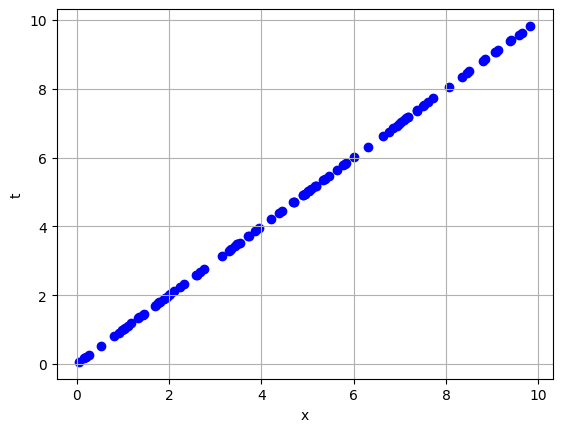

In [4]:
# Test your function by plotting a line
# and printing the first 10 points in your array.

data = generate_line(100, 0, 10, 0, 1)
print(data[:10])
plot_curve(data)

### b) Polynomial Data
Now modify the above function, to create a new function:

 `generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2])`

This is the same as `generate_line`, except that instead of two parameters $c_0$ ane $c_1$, you can provide as an argument a vector $[c_0, c_1, \dots, c_D]$ of arbitrary length $D+1$, where the $c_i$'s  represent the coefficients of a polynomial.

 So for example, if you write:
 `generate_poly(coeffs=[1, 5, 2, -4])`
then this would generate points along the polynomial $t = 1 + 5x + 2x^2 - 4 x^3$.

That is, $\text{coeffs}=[c_0, c_1, \dots, c_D]$ will make your function generate data from the polynomial $t = c_0 + c_1 x + c_2 x^2 + … + c_D x^D$. This function should also return a list (or `numpy.ndarray`) $[[x_0, t_0], [x_1,t_1], \dots, [x_n,t_n]]$.

> NOTE: `numpy.vander` function does exactly this but you're not allowed to use it for this particular question. We want you to understand how to build this on your own.

#### Answer 1b.

In [5]:
# GRADED FUNCTION
import numpy as np
def generate_poly(n=100, xmin=0, xmax=10, coeffs=[1, 2]):
    input_points = np.random.uniform(xmin, xmax, n) #generating random n inputs
    target_values = np.zeros_like(input_points)

    for i, coeff in enumerate(coeffs):
      target_values += coeff*np.power(input_points, i) #computing target values

    data = np.column_stack((input_points, target_values)) #combining input and target values
    return data

#### Manual Test 1b.

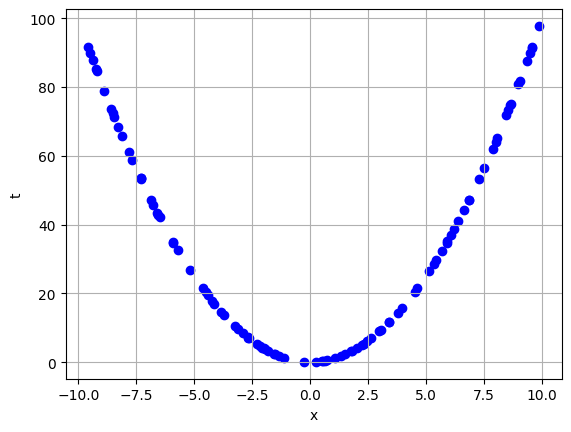

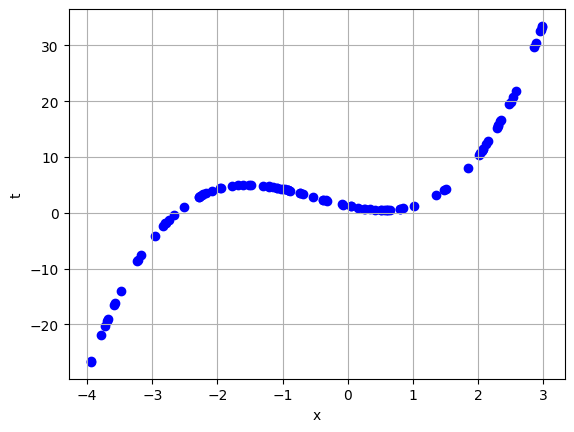

In [6]:
num_pts = 100
x_min, x_max = (-4, 3)
coefficients = [5/4, -5/2, 3/2, 1]

# Test against a known curve: x^2
data = generate_poly(100, -10, 10, coeffs=[0,0,1])
plot_curve(data)

# Test given curve
data = generate_poly(num_pts, x_min, x_max, coefficients)
plot_curve(data)

### c) Noisy Polynomial Data.
Finally, rewrite your `generate_poly()` function to use the function `noise(mean, standard_deviation)` below to add random gaussian noise to every generated data point, so that the targets $t$ are
$t = \Sigma_i (c_i x^i) + \text{noise}(\theta, \sigma)$. This should make your line look noisy and not perfect.

In [7]:
def noise(mean, standard_deviation):
    return random.gauss(mean, standard_deviation)

In [8]:
# GRADED FUNCTION
def generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1], theta=0.5, sigma=0.5):
    input_points = np.random.uniform(xmin, xmax, n) #generating random n inputs
    target_values = np.zeros_like(input_points)

    for i, coeff in enumerate(coeffs):
      target_values += coeff*np.power(input_points, i)

    noisy_target_values = target_values + np.array([noise(theta, sigma) for _ in range(n)]) #adding noise to every calculated target value

    data = np.column_stack((input_points, noisy_target_values)) #combining input and target values
    return data



#### Manual Test 1c.

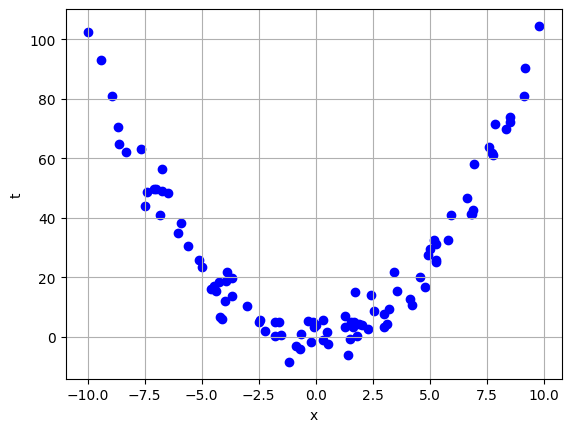

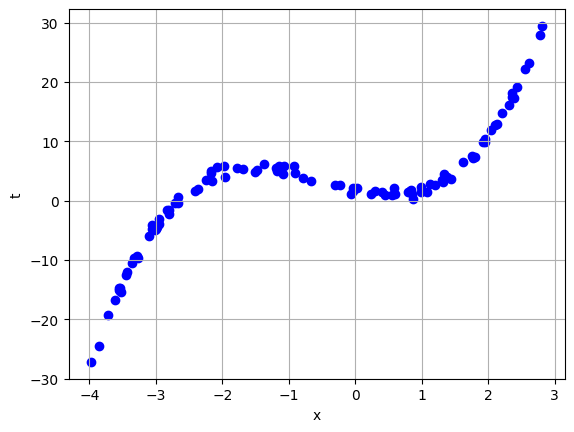

In [9]:
# Test against a known curve: x^2
data = generate_poly_noisy(100, -10, 10, coeffs=[0,0,1], theta=0, sigma=5)
plot_curve(data)

# Test given curve (from previous section)
data = generate_poly_noisy(num_pts, x_min, x_max, coefficients)
plot_curve(data)

## **2. Gradient Descent** ( 8 pts)
In this question we will learn first hand how gradient descent works, in the context of a synthetic dataset and a simple model:

You will write functions that implement gradient descent to fit a linear regression model to data. To test your model and your optimizer, you will use data generated by your function from Question 1.

Note that to keep the assignment short, you are not required to use a validation or test set. Normally this would be an essential part of the process. However, this exercise focuses on the inner workings of gradient descent applied to the quadratic cost function as (was / will be) learned in class.

Your model will have the form

$y = w_0 + w_1 x$,

where $w_0$ and $w_1$ are the parameters of your model, $x$ is the input, and $y$ is your model's prediction.


> Note: It's important that the
code you write is well documented and that no other external package is used (pandas, numpy
are ok).

### a) Linear Regression

Given the values of $x$, we want to fit a linear regression model to predict the $y$ values. We will implement a vectorized version of the gradient descent algorithm. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The coefficients ($\theta$) have been initialized for you. Use Mean Squared Error as the loss function. The shape of the variables $\mathbf{X}$, $t$, and **b** have been given, use this as a guide to output the appropriate shape.

Fill in the gradient descent iteration loop and return the updated `cost_list` and parameters. Please be sure your code is well commented!

> Hint: Some tips for choosing values for the learning rate `lr` and the number of steps to run for `iterations`: this depends greatly on the complexity of your dataset and the sophistication of your model. In this instance the learning rate can be small, on the order of ~0.001. As for the number of iterations, try running the algorithm for 1000 steps. If it seems the model has stopped learning after fewer, say, 500, reduce the number of iterations and run it again!

In [10]:
# GRADED FUNCTION
def calculate_gradients(X, t, y):
    N = X.shape[0]
    gradients = (2/N) * X.T.dot(y - t) #y - t for error term and dot product is for dot product between X transpose and error term, 2/N scales well
    return gradients

# GRADED FUNCTION
def prediction_cost(t, y):
    N = t.shape[0]
    cost = np.sum((y - t) ** 2) / N #to calculate MSE, average the square of difference between y and t
    return cost

# GRADED FUNCTION
def LR(X, t, lr, iterations):
    # Ensure X is a 2D array. If X is 1D (e.g., shape (N,)), reshape it to (N, 1)
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Adding 1 column in X for bias
    b = np.ones((len(X), 1))             # shape : (N, 1)
    X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1, 1)
    t = t.reshape(-1, 1)                 # shape : (N, 1)
    cost_list = []

    for _ in range(iterations):
        # calculate current predictions
        y = X_b.dot(theta)

        # get the cost of the prediction
        cost = prediction_cost(t,y)

        # calculate the partial derivatives
        gradients = calculate_gradients(X_b, t, y)

        # update the weights
        theta = theta - lr * gradients

        # append the value to the cost list
        cost_list.append(cost)

    return cost_list, y, theta

We've included a function below to help you visualize your model's predictions. Pass in your dataset with input $\mathbf{X}$ and target $t$, and your model's predictions $y$ and cost list `cost_list` as returned from `LR()` to see them graphed.

In [11]:
import matplotlib.pyplot as plt
def graph_lr(X, t, y, cost_list):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.title('Model Predictions vs Actual Targets')
    plt.scatter(X, t, c='g', s=10, label="targets")
    plt.scatter(X, y, c='b', s=10, label="predictions")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title('Model Cost')
    plt.plot(range(len(cost_list)), cost_list, c='b')
    plt.show()

Play around with different curves, noise leves, iterations, learning rate, etc. See how each one affects the way the model learns.

Show a graph of your LR function working using the `graph_lr` function.
Then report your findings on:

- iterations vs cost
- learning rate vs cost

use graphs to show your results.

I've provided you with some starter code but feel free to change everything in the cell below. The two key things we want to see are: how does your model do against a straight line and the results of your experiments with learning rate and number of iterations.


Learning rate: 0.0001, Iterations: 100, Final Cost: 92.18305389678915


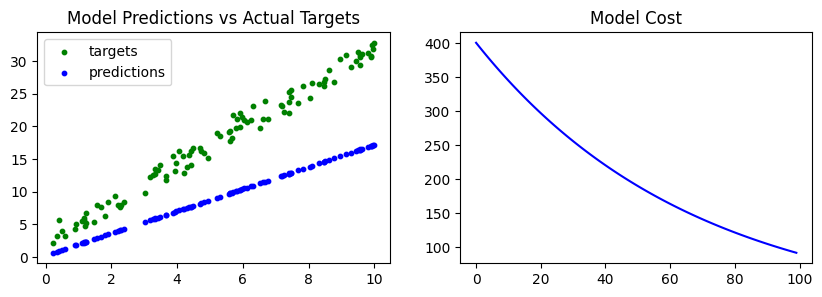

Learning rate: 0.0001, Iterations: 500, Final Cost: 2.1165684613972355


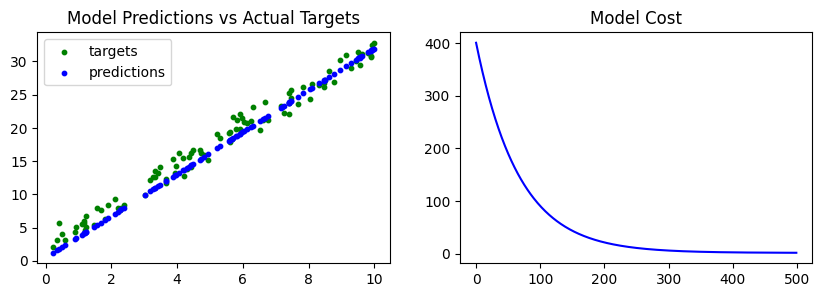

Learning rate: 0.0001, Iterations: 1000, Final Cost: 1.8614525747492718


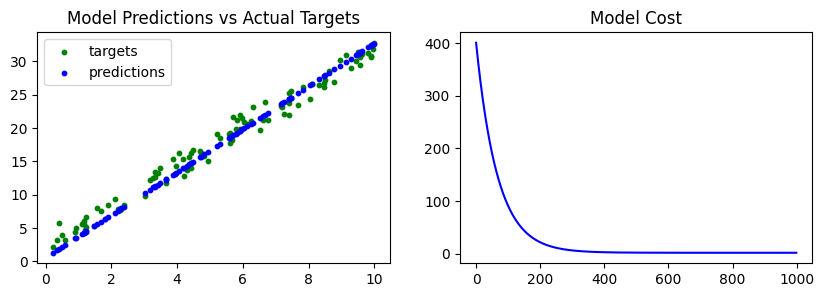

Learning rate: 0.001, Iterations: 100, Final Cost: 1.861960717213928


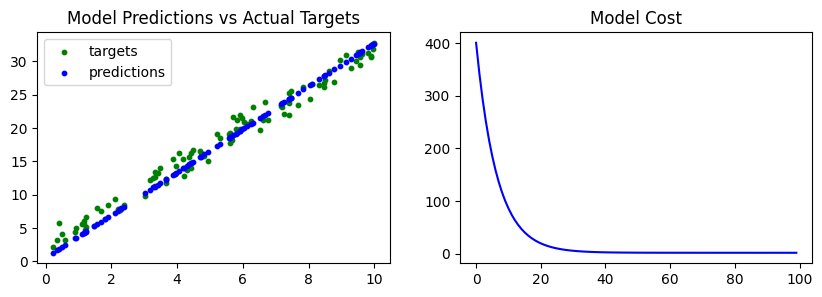

Learning rate: 0.001, Iterations: 500, Final Cost: 1.652408494191902


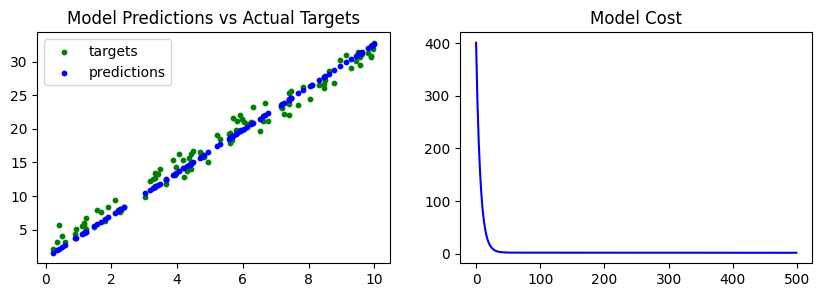

Learning rate: 0.001, Iterations: 1000, Final Cost: 1.476989272755394


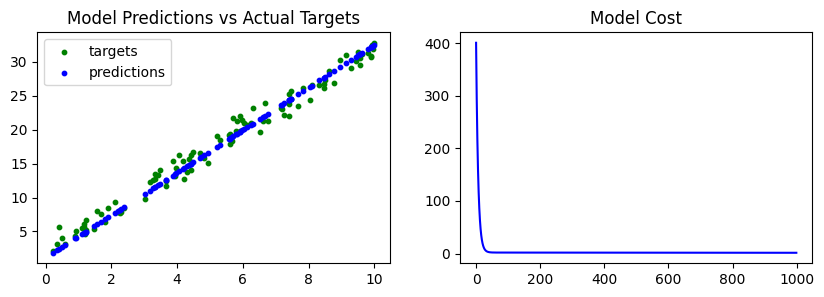

Learning rate: 0.01, Iterations: 100, Final Cost: 1.4789407740545177


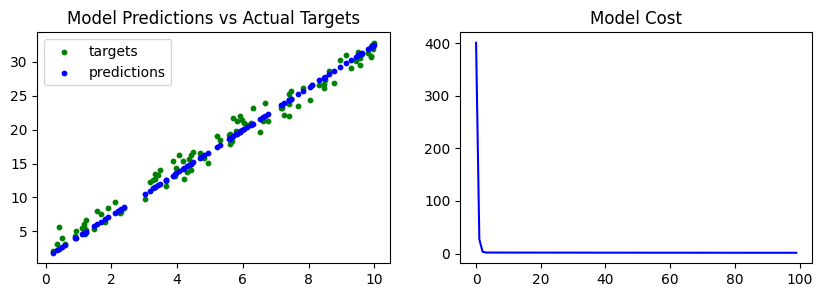

Learning rate: 0.01, Iterations: 500, Final Cost: 1.175515772629266


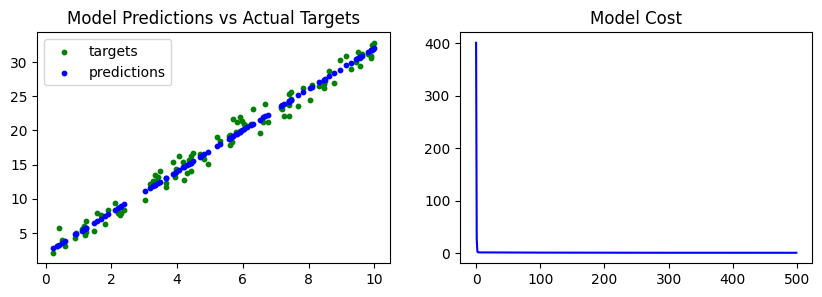

Learning rate: 0.01, Iterations: 1000, Final Cost: 1.1670384054662357


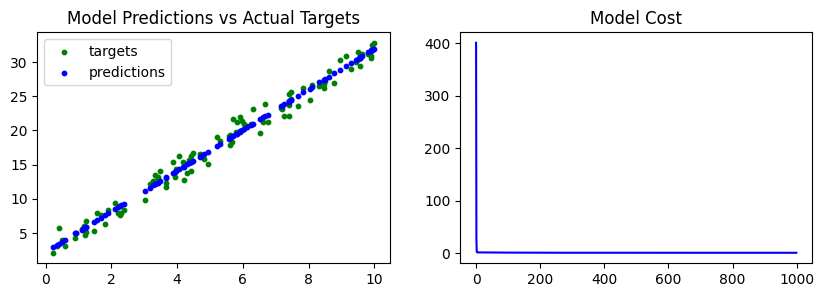

Learning rate: 0.1, Iterations: 100, Final Cost: 1.6235443042969947e+163


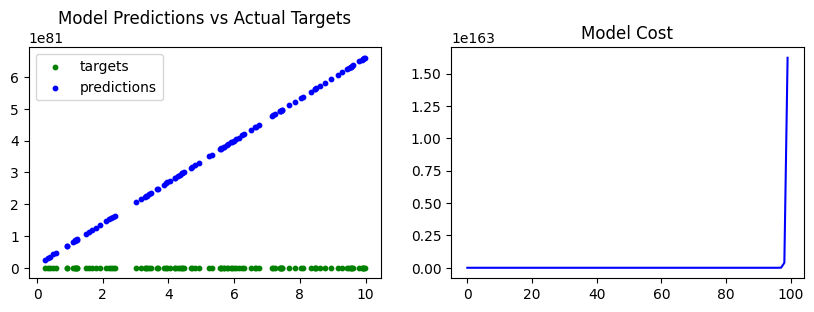

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-10-2eb42e3430a2>:10: RuntimeWarning: overflow encountered in square
  cost = np.sum((y - t) ** 2) / N #to calculate MSE, average the square of difference between y and t
<ipython-input-10-2eb42e3430a2>:37: RuntimeWarning: invalid value encountered in subtract
  theta = theta - lr * gradients


Learning rate: 0.1, Iterations: 500, Final Cost: nan


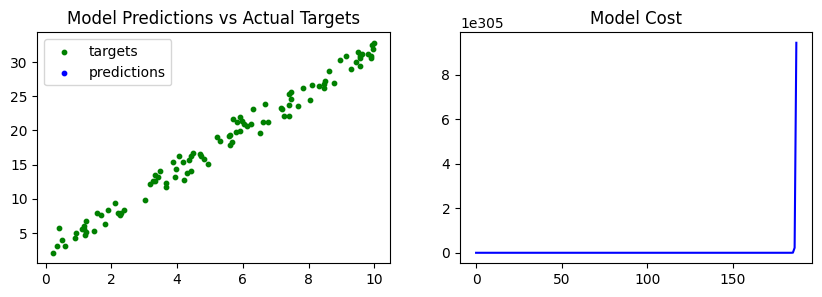

Learning rate: 0.1, Iterations: 1000, Final Cost: nan


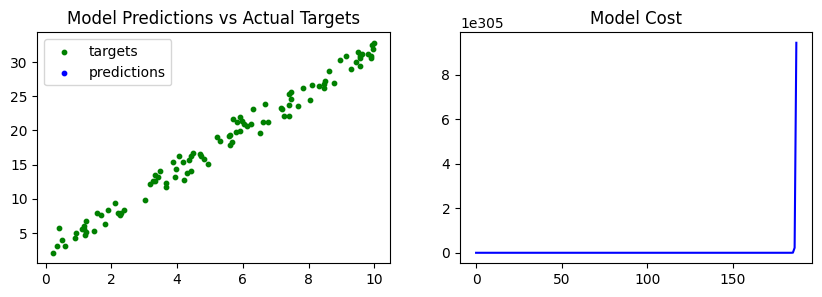

In [12]:
# GRADED SECTION

data = generate_poly_noisy(n=100, xmin=0, xmax=10,coeffs=[2, 3], theta=0, sigma=1)

X = data[:, 0]
X = X.reshape(-1, 1)
t = data[:, 1]

#Defining a list of learning rates and iterations to test
learning_rates = [0.0001, 0.001, 0.01, 0.1]
iterations_list = [100, 500, 1000]

#Loop over the different learning rates and iterations
for lr in learning_rates:
    for iterations in iterations_list:
        cost_list, y, theta = LR(X, t, lr, iterations)

        print(f"Learning rate: {lr}, Iterations: {iterations}, Final Cost: {cost_list[-1]}")
        graph_lr(X, t, y, cost_list)

### b) Closed Form Solution
Compare this model with a solution computed in closed form. Input ($\mathbf{X}$) and target ($t$) are provided as arguments. $\mathbf{X}$ is modified ($\mathbf{X}_b$) to account for the bias. The function should return the optimum parameter $\theta$.


In [13]:
from numpy.linalg import inv

def linear_direct(X, t):
  theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))

  return theta

In [14]:
# Parameters found by direct method (closed form)
linear_direct(X, t).astype(int)

array([3])

In [15]:
# Parameters found by gradient descent
theta.astype(int)

<ipython-input-15-79e82752739b>:2: RuntimeWarning: invalid value encountered in cast
  theta.astype(int)


array([[-9223372036854775808],
       [-9223372036854775808]])

### c) Discussion

Discuss how the choice of learning rate and number of iterations in part a) affects the fitting of the model.


#### Answer c

A small learning rate ensures careful updates but requires more iterations for convergence.
A large learning rate speeds up the process but may cause overshooting or divergence.
Fewer iterations can leave the model underfitted, while more iterations allow for better convergence but increase the risk of overfitting.

### d) Stochastic Gradient Descent

Write a version of gradient descent that does stochastic gradient descent with mini-batches as described in class/tutorial. The function will take the same parameters as before, but also an additional parameter `m` that specifies the mini-batch size.

Provide error plots and experiment with different values of mini-batch size `m` and step-size (learning rate `lr`). Show how you can call it so that it works reasonably well, and discuss your observations briefly. Are you able to call it in a way so that it does not work?

In [16]:
# GRADED FUNCTION
def stochastic_gradient_descent(X, t, lr, iterations, m):
  b = np.ones((len(X), 1))             # shape : (N, 1)
  X_b = np.append(X, b, axis=1)        # shape : (N, features + 1)
  t = t.reshape(-1, 1)                 # shape : (N, 1)
  theta = np.zeros((X_b.shape[1], 1))  # shape : (features + 1 ,1)
  cost_list = []


  for _ in range(iterations):
    indices = np.random.permutation(len(X_b))
    X_b_shuffled = X_b[indices]
    t_shuffled = t[indices]
    for start in range(0, X_b.shape[0], m):
        end = start + m
        X_batch = X_b_shuffled[start:end] #mini batch of inputs
        t_batch = t_shuffled[start:end] # mini batch for targets
        y_batch = X_batch.dot(theta) # preds for mini batch
        gradients = (2/m) * X_batch.T.dot(y_batch - t_batch)
        theta -= lr * gradients

        cost = np.sum((X_b.dot(theta) - t) ** 2) / t.shape[0]
        cost_list.append(cost)

    y = X_b.dot(theta)

  return cost_list, y, theta


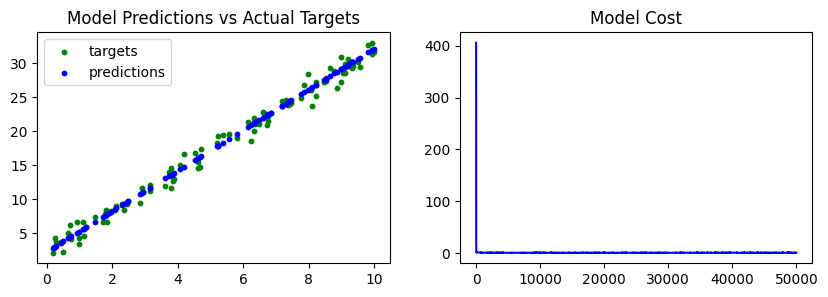

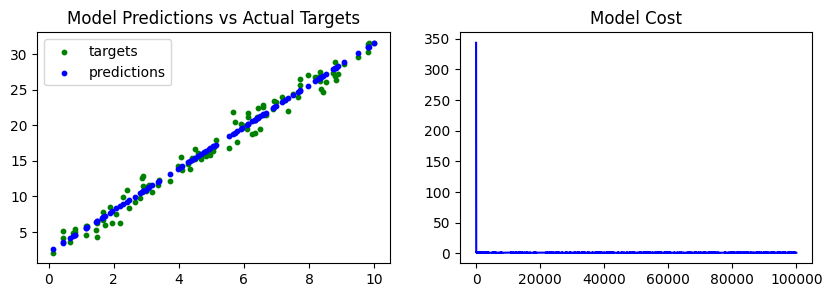

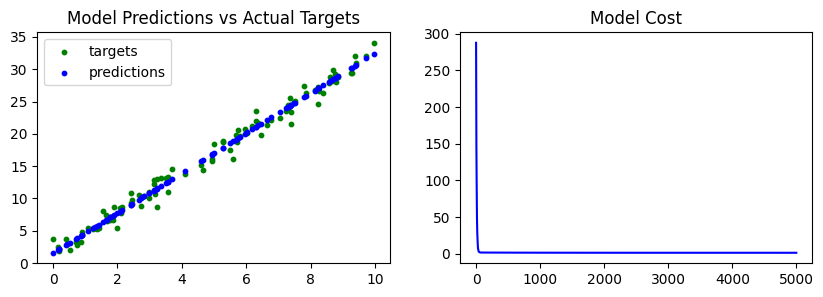

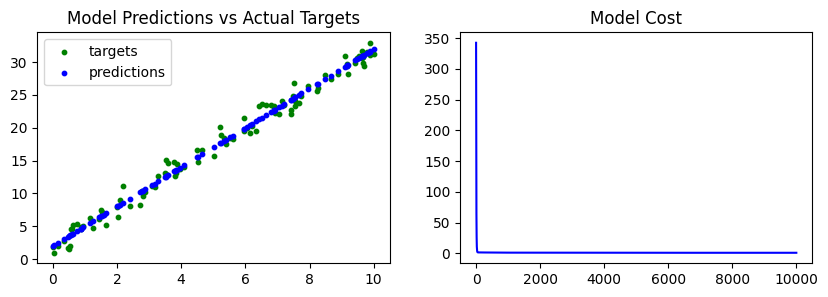

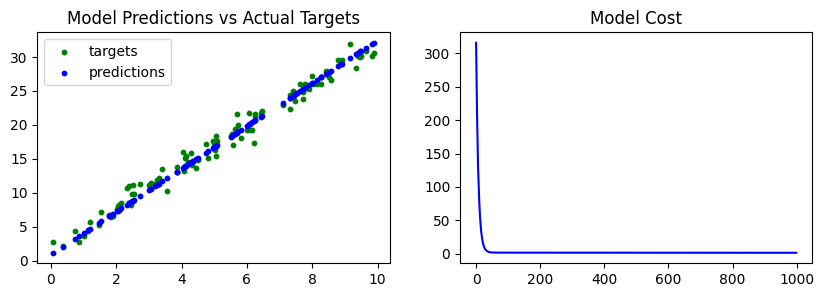

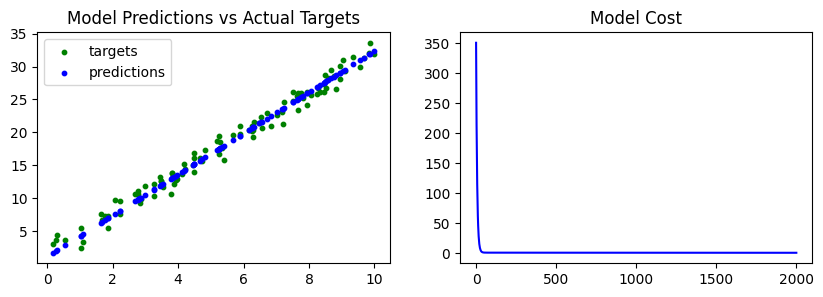

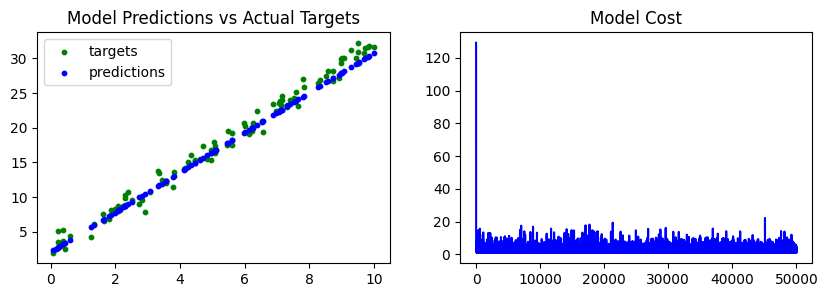

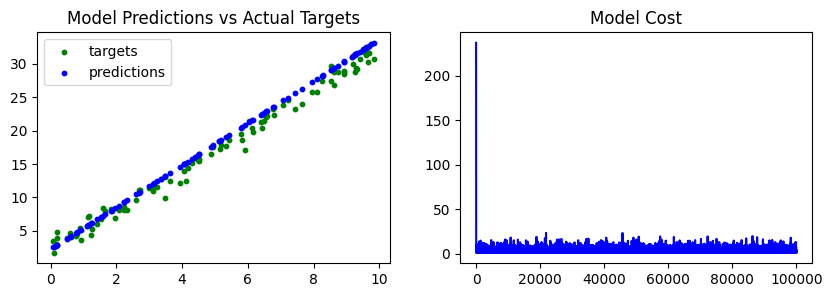

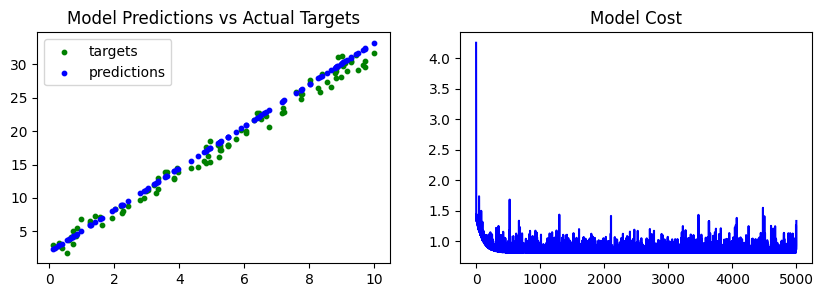

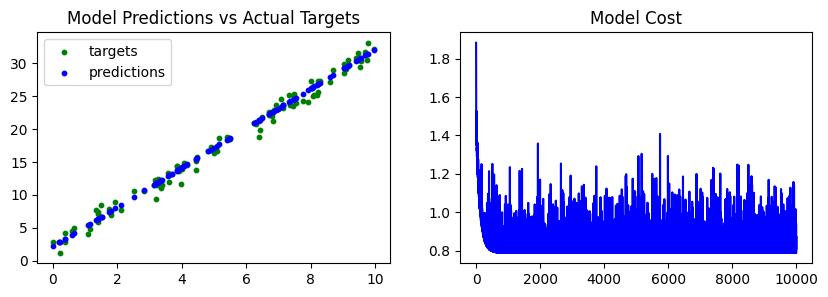

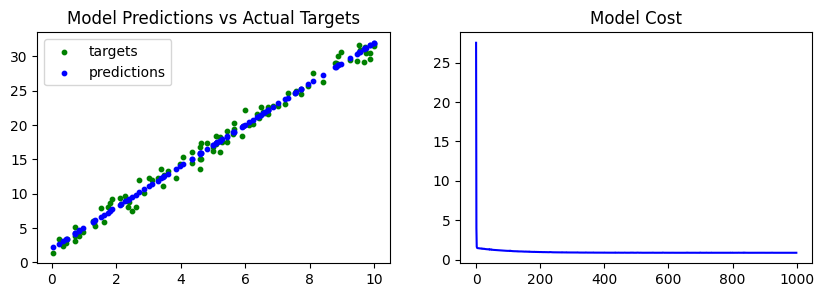

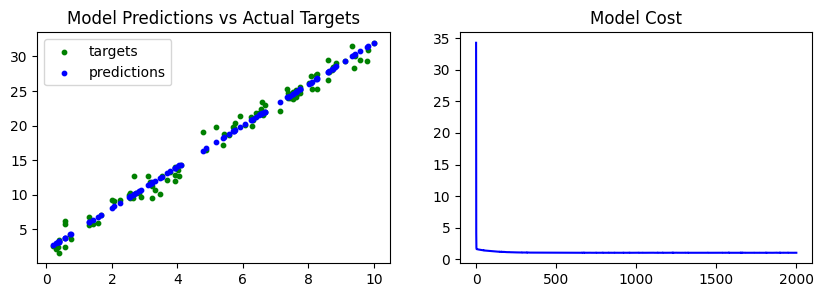

<ipython-input-16-c9b431828903>:22: RuntimeWarning: overflow encountered in square
  cost = np.sum((X_b.dot(theta) - t) ** 2) / t.shape[0]
<ipython-input-16-c9b431828903>:19: RuntimeWarning: overflow encountered in multiply
  gradients = (2/m) * X_batch.T.dot(y_batch - t_batch)
<ipython-input-16-c9b431828903>:20: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


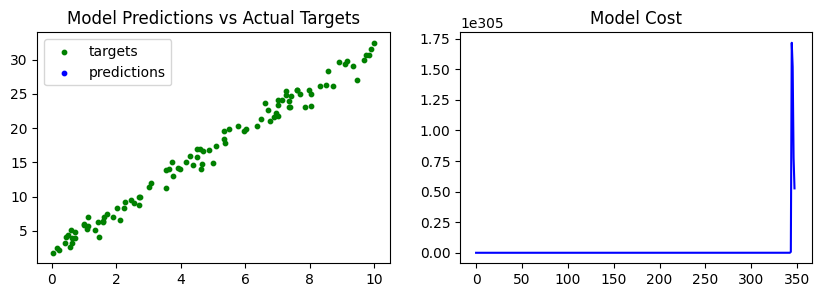

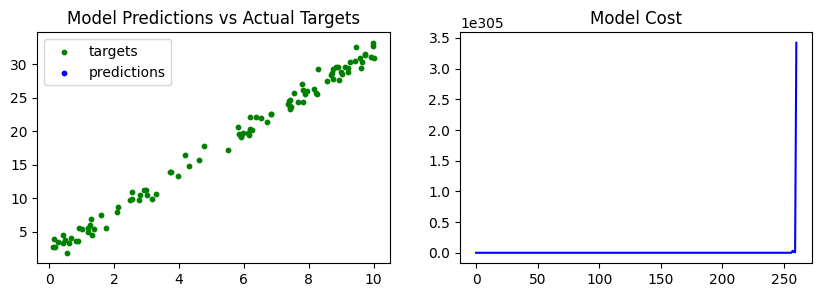

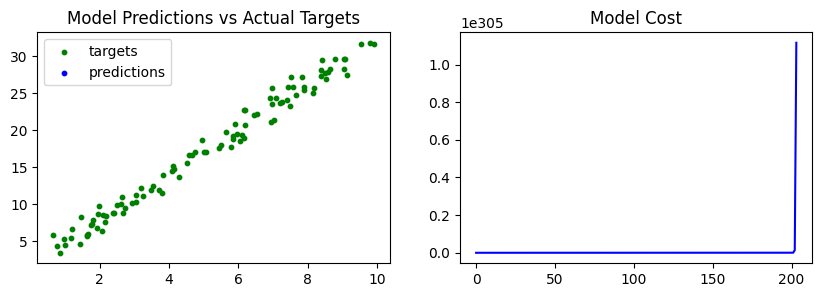

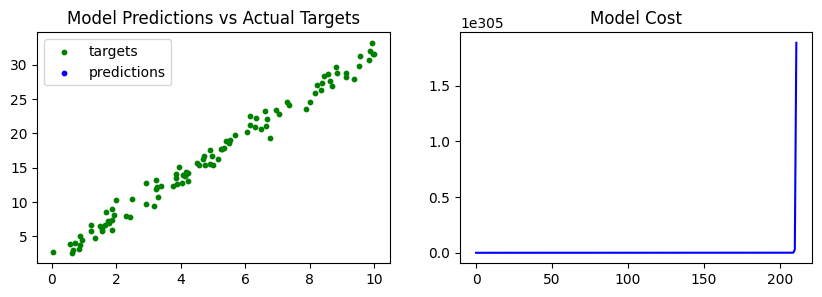

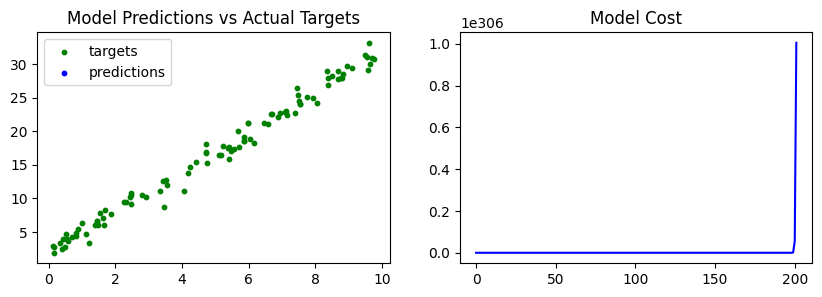

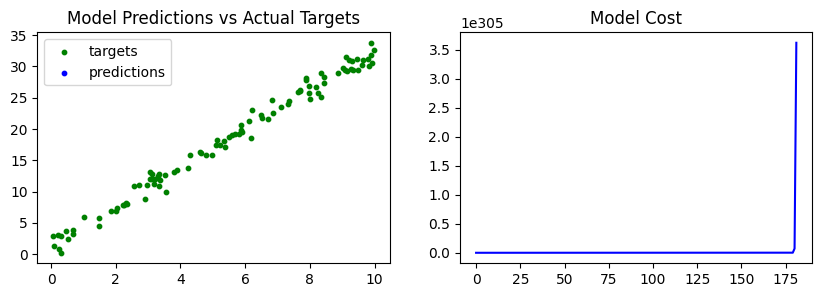

In [17]:
# section for graphs and experiments

def run_experiments(lr_values, m_values, iteration_values, data_generator):
    for lr in lr_values:
        for m in m_values:
            for iterations in iteration_values:
                #Generating a new dataset for each experiment
                data = data_generator(n=100, xmin=0, xmax=10, coeffs=[2, 3], theta=0, sigma=1)
                X = data[:, 0].reshape(-1, 1)
                t = data[:, 1]

                #Run stochastic gradient descent
                cost_list, y, theta = stochastic_gradient_descent(X, t, lr, iterations, m)

                # Visualize results
                graph_lr(X, t, y, cost_list)

#Parameters to experiment with
lr_values = [0.001, 0.01, 0.1]
m_values = [1, 10, 50]
iteration_values = [500, 1000]

run_experiments(lr_values, m_values, iteration_values, generate_poly_noisy)

# try to have cells be self-contained - use local variables and regenerate data

#### Observations (answers part d)
Small Learning Rate + Small Mini-Batch Size:

The updates are both slow and noisy, which can lead to very slow convergence or even divergence if the mini-batch size is too small.

High Learning Rate + Small Mini-Batch Size:

The combination of large, noisy updates can cause the model to fluctuate wildly and never converge properly.

Moderate Learning Rate + Moderate Mini-Batch Size:

This is often the most effective combination. It allows the model to converge steadily with reasonably fast updates while maintaining stability in the cost function.

High Learning Rate + Large Mini-Batch Size:

Large updates combined with stable gradients may lead to quick convergence but can also risk overshooting if the learning rate is too high.

Weird cases:
Very High Learning Rate: The cost will likely oscillate or increase, as the model jumps around without settling into a minimum.

Too Small Mini-Batch Size: If m=1 and the learning rate is too high, the model’s cost function may behave erratically and never converge.


Learning Rate: A moderate learning rate (like 0.01) is often the sweet spot for convergence speed and stability. Low learning rates lead to slow training, and high learning rates can make the model unstable.

Mini-Batch Size: Moderate mini-batch sizes (like 10) provide a good balance between noisy updates and stable training. Too small or too large can hinder performance.

Iterations: More iterations generally allow better convergence but can lead to overfitting if pushed too far without regularization.


## **3. Polynomial Features** ( 8 pts)

What happens if you try to fit a linear regression model to cubic data? As you may have observed in the previous question, your model is not powerful enough--all it can really fit well are straight lines! But no need to worry, now you will extend your model by providing it will non-linear features.

### a) Compute the Features

First let's compute the values of these features. Let's assume we know that the relevant features are powers of $x$. For a given $x$, and a given $D$, write a function that takes in $x$ and $D$ and outputs a vector
$[x^0, x^1, x^2, \dots, x^D]$
consisting of the powers of $x$, from $0$ to $D$. So for example, `compute_features(x = 5, D = 3)` will return `[1, 5, 25, 125]`.

> Note: You can use `np.vander` here if you'd like. Make sure you read the documentation for this function before using it - it doesn't give you exactly what you'd expect.


In [18]:
# GRADED FUNCTION
def compute_features(x, D):
    # your code here
    x_powers = np.array([x**i for i in range(D+1)])
    return x_powers

# quick check to ensure function works as expected
compute_features(5, 3), compute_features(2, 11)

(array([  1,   5,  25, 125]),
 array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
        2048]))

### b) Define the Model

Your new model will have the following form: $y = w_0 + w_1 x + \dots w_D x^D$.

This section is just a little practice before writing the actual polynomial gradient descent so that you understand that you're doing.


In [19]:
# GRADED SECTION

data = generate_poly_noisy(n=3, xmin=0, xmax=10, coeffs=[0, 10], theta=0, sigma=1)

X = data[:, 0]
t = data[:, 1]
N = X.shape[0]

dims = 3
lr = 0.01

# use the function you just wrote
X_d = np.array([compute_features(x, dims) for x in X])

# initialize the weights to 0
theta = np.zeros((X_d.shape[1], 1))

# compute the predictions
y = X_d.dot(theta)

# compute the gradients for a single step
gradients = (2/N) * X_d.T.dot(y - t.reshape(-1, 1))

# update your weights
updated_theta = theta - lr * gradients

# calculate a new prediction
new_y = X_d.dot(updated_theta)

print(f"{X=}\n")
print(f"{X_d=}\n")
print(f"{theta=}\n")
print(f"{gradients=}\n")
print(f"{updated_theta=}\n")
print(f"{new_y=}\n")

X=array([9.4846198 , 3.23381495, 5.52297121])

X_d=array([[  1.        ,   9.4846198 ,  89.95801277, 853.21754919],
       [  1.        ,   3.23381495,  10.45755912,  33.817811  ],
       [  1.        ,   5.52297121,  30.50321098, 168.46835607]])

theta=array([[0.],
       [0.],
       [0.],
       [0.]])

gradients=array([[  -121.26132451],
       [  -869.96549252],
       [ -7001.26705603],
       [-60461.74625893]])

updated_theta=array([[  1.21261325],
       [  8.69965493],
       [ 70.01267056],
       [604.61746259]])

new_y=array([[522252.15587232],
       [ 21208.34640645],
       [104043.78179186]])



### c) Implement Gradient Descent

Implement gradient descent and plot your predictions

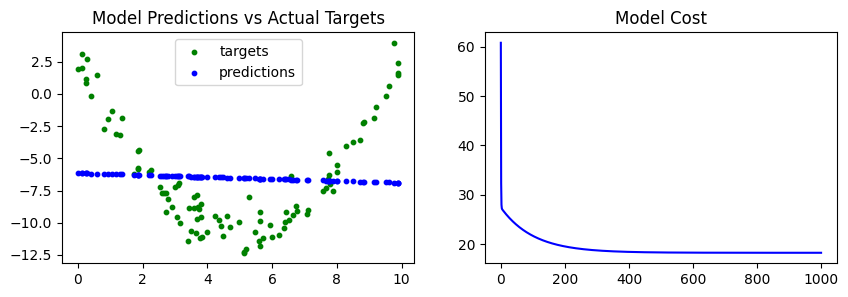

In [20]:
# GRADED FUNCTION
def poly_gradient_descent(X, t, lr, iterations, dims):
  X_d = np.vander(X, dims, increasing=True)
  t = t.reshape(-1, 1)
  theta = np.zeros((X_d.shape[1], 1))
  cost_list = []

  for i in range(iterations):

    # your code here (~ 4-5 lines)
    y = X_d.dot(theta)
    cost = np.sum((y - t) ** 2) / t.shape[0]
    gradients = (2/t.shape[0]) * X_d.T.dot(y - t)
    theta -= lr * gradients
    cost_list.append(cost)

  return cost_list, y, theta

  # Generate data
data = generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[2, -5, 0.5], theta=0, sigma=1)
X = data[:, 0]
t = data[:, 1]

# Set parameters
lr = 0.01
iterations = 1000
dims = 2  # Degree of polynomial

# Run gradient descent
cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

# Visualize results
graph_lr(X, t, y, cost_list)


#### Automated Tests 3c

These should test your algorithm against some fixed curves so that you can see how well your algorithm does. We **HIGHLY** recommend playing around with your function yourself so that you can see how it behaves. These tests are just a **starting point**.

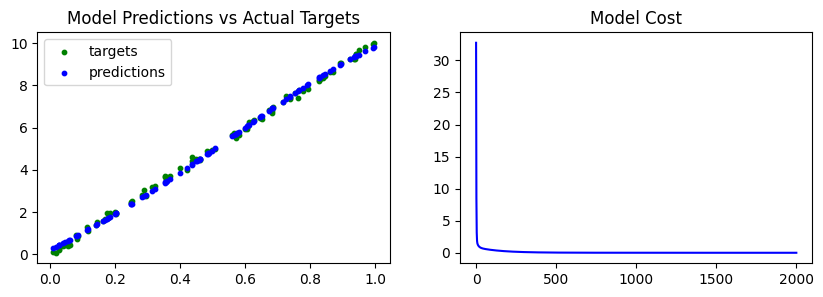

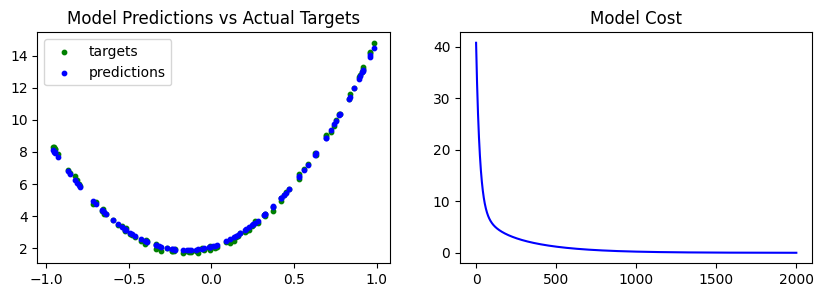

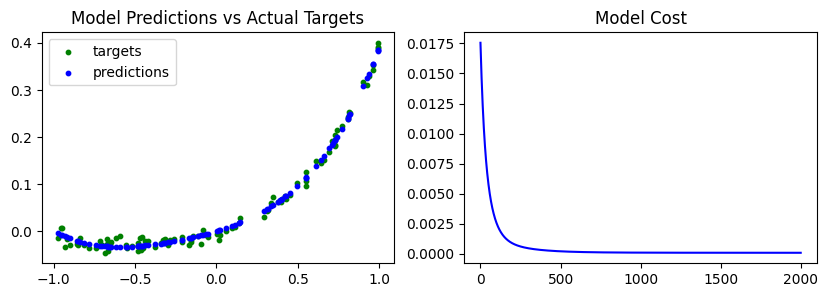

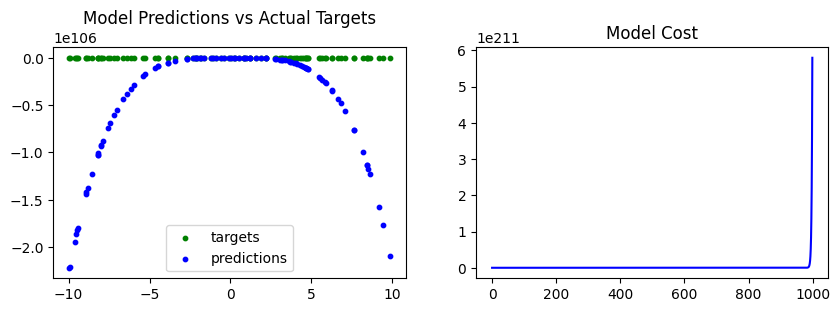

In [21]:
def test_against_line():
  '''
  This function tests the created poly_gradient_descent
  against a simple line. We calculate up to 3 dimensions 1, x, x^2
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=0, xmax=1,
                            coeffs=[0, 10], theta=0, sigma=0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.1
  dims = 6
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_quad():
  '''
  This function tests the created poly_gradient_descent
  against a quadratic polynomial. We calcualte up to 3 dimensions 1, x, x^2
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=-1, xmax=1,
                            coeffs=[2, 3, 10], theta=0, sigma=0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.01
  dims = 3
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_deg4():
  '''
  This function tests the created poly_gradient_descent
  against a quadratic polynomial. We calcualte up to 5 dimensions
  of weights.
  '''
  data = generate_poly_noisy(n=100, xmin=-1, xmax=1,
                            coeffs=[0, 0.1, 0.1, 0.1, 0.1], theta=0, sigma=0.01)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.01
  dims = 5
  iterations = 2000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

def test_against_poly():
  '''
  This function tests the created poly_gradient_descent
  against the given polynomial from a previous question.
  '''
  data = generate_poly_noisy(100, -10, 10, [5/16, -5/8, 3/8, 1/4], 0, 0.1)
  X = data[:, 0]
  t = data[:, 1]
  lr = 0.0000001
  dims = 5
  iterations = 1000
  cost_list, y, theta = poly_gradient_descent(X, t, lr, iterations, dims)

  graph_lr(X, t, y, cost_list)

test_against_line()
test_against_quad()
test_against_deg4()
test_against_poly()


### d) Regularization & SGD (**)

Here you need to do two things:
1. Add a regularization term  to the loss function, $\text{Loss_reg} = sum (w_i)^2$ the sum of the squares of the weights. That is, the model will be penalized for large weights.
2. Compute the derivative of the loss with respect to this term, and add it to the gradient computation. This should make the gradients cause the weights to gradually decrease, unless they are actively useful for the model.

Use stochastic gradient descent. This means that instead of computing the gradient on the entire dataset, you will now just work with a few examples at a time. Your gradient descent function can now also take a `batch_size`, so that it randomly selects that size of subset from the full example set.


#### What is the derivative of the regularization term?


Compute the derivative of the regularization term here.

$Loss$$_r$$_e$$_g$ =  $λ$ $∑$ $w_i$$^2$  

the regulrizer term is lambda in this case, if we take the derivative of this term, we get:  2$w_i$

### Coding Answer

In [22]:
# GRADED FUNCTION
def stochastic_gradient_descent_with_regularization(X, t, lr, iterations, rt, dims, m):
    # your code here
    b = np.ones((len(X), 1))             # shape: (N, 1)
    X_b = np.append(X, b, axis=1)        # shape: (N, features + 1)
    t = t.reshape(-1, 1)                 # shape: (N, 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape: (features + 1, 1)
    cost_list = []

    for _ in range(iterations):
        indices = np.arange(X_b.shape[0])
        np.random.shuffle(indices)
        X_b_shuffled = X_b[indices]
        t_shuffled = t[indices]

        for start in range(0, X_b.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            t_batch = t_shuffled[start:end]
            y_batch = X_batch.dot(theta)

            # Predict
            y_batch = X_batch.dot(theta)

            # Compute gradients with regularization
            gradients = (2/batch_size) * X_batch.T.dot(y_batch - t_batch) + 2 * reg_lambda * theta

            # Update theta
            theta -= lr * gradients

        # Calculate cost for the entire dataset with regularization
        y_full = X_b.dot(theta)
        cost = (np.sum((y_full - t) ** 2) / t.shape[0]) + reg_lambda * np.sum(theta ** 2)
        cost_list.append(cost)

    return cost_list, y_full, theta

#### Manual Testing

Plot a few graphs and test your function on different lines and at different noise levels. See how the regularization is affecting your model as it goes through the iterations. Compare your model with regulariation against the one without. Remember that you also have `stochastic_gradient_descent` from your previous answers.

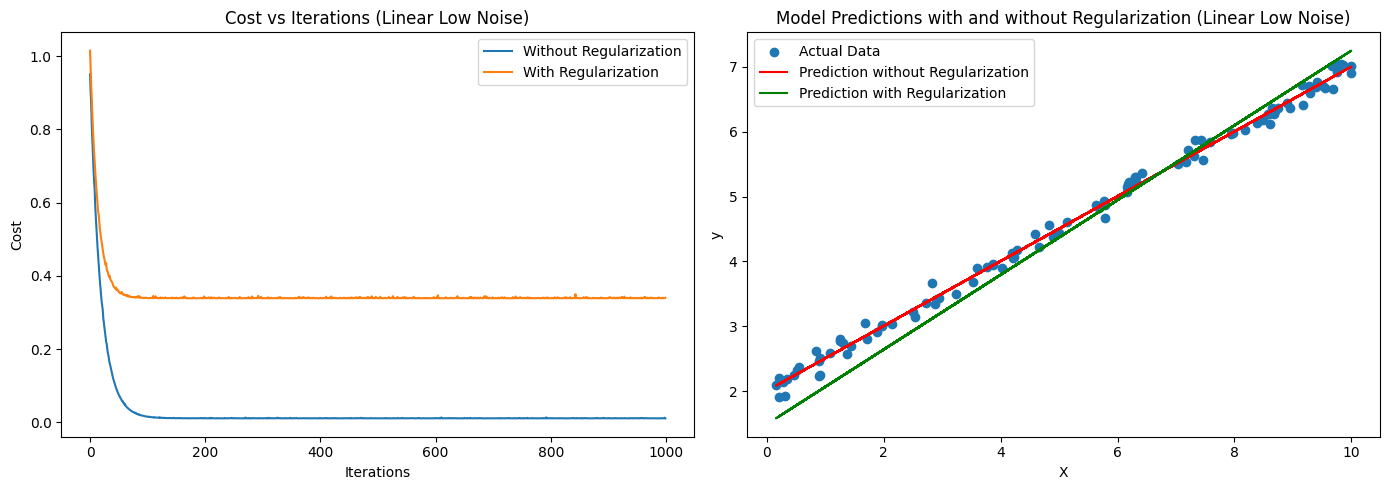

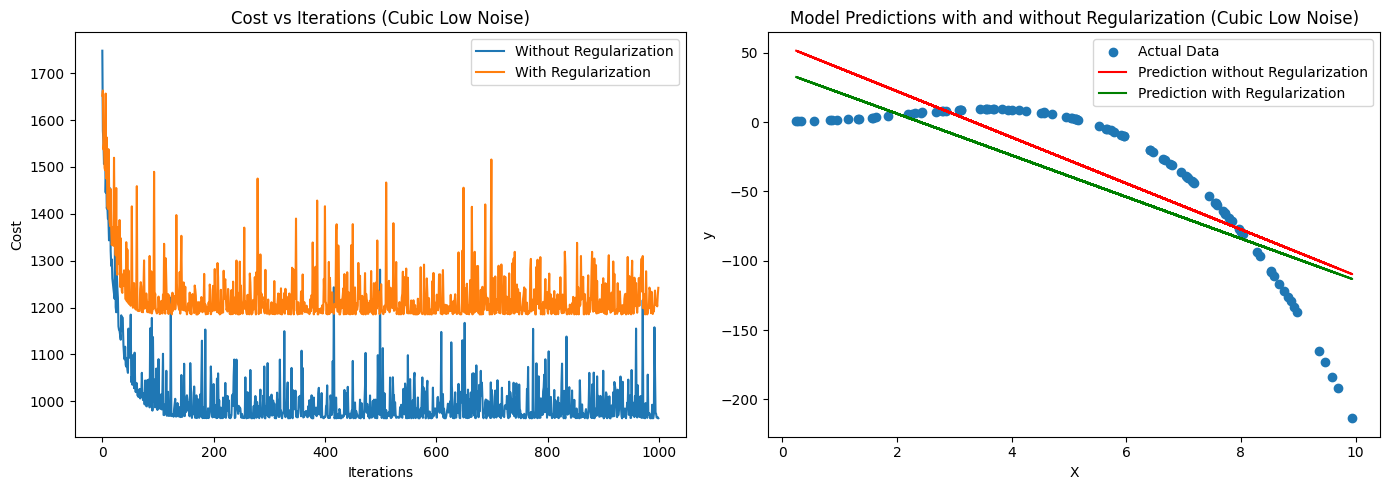

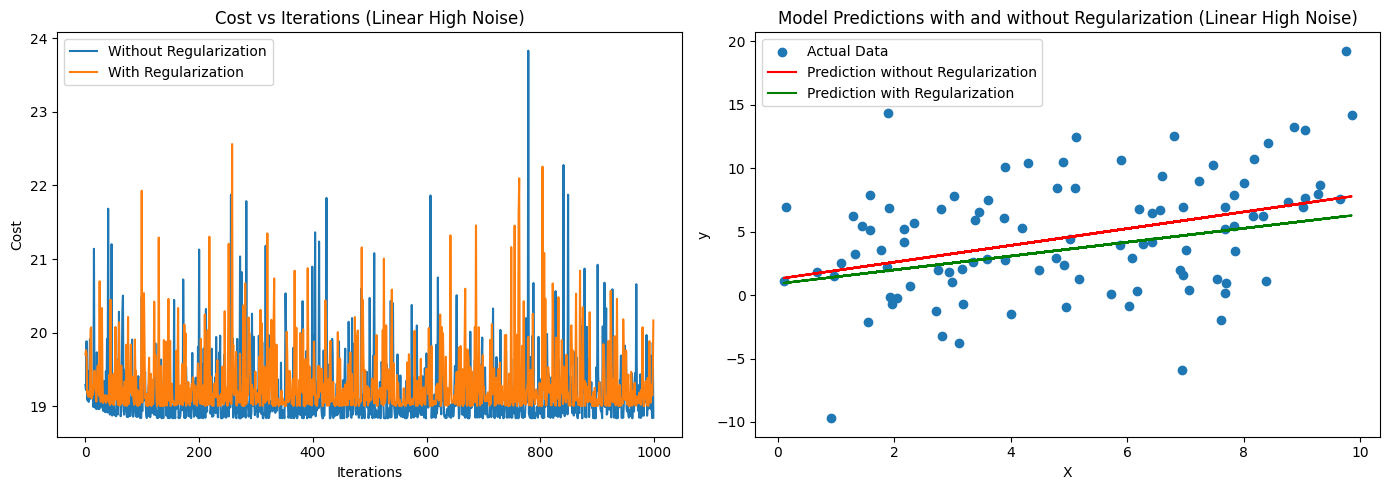

In [23]:
# GRADED FUNCTION
def stochastic_gradient_descent_with_regularization(X, t, lr, iterations, reg_lambda, batch_size):
    X = X.reshape(-1, 1)  # Ensure X is 2D
    b = np.ones((len(X), 1))  # shape: (N, 1)
    X_b = np.append(X, b, axis=1)  # shape: (N, features + 1)
    t = t.reshape(-1, 1)  # shape: (N, 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape: (features + 1, 1)
    cost_list = []

    for _ in range(iterations):
        indices = np.arange(X_b.shape[0])
        np.random.shuffle(indices)
        X_b_shuffled = X_b[indices]
        t_shuffled = t[indices]

        for start in range(0, X_b.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            t_batch = t_shuffled[start:end]

            # Predict
            y_batch = X_batch.dot(theta)

            # Compute gradients with regularization
            gradients = (2 / batch_size) * X_batch.T.dot(y_batch - t_batch) + 2 * reg_lambda * theta

            # Update theta
            theta -= lr * gradients

        # Calculate cost for the entire dataset with regularization
        y_full = X_b.dot(theta)
        cost = (np.sum((y_full - t) ** 2) / t.shape[0]) + reg_lambda * np.sum(theta ** 2)
        cost_list.append(cost)

    return cost_list, y_full, theta


def stochastic_gradient_descent(X, t, lr, iterations, batch_size):
    X = X.reshape(-1, 1)  # Ensure X is 2D
    b = np.ones((len(X), 1))             # shape: (N, 1)
    X_b = np.append(X, b, axis=1)        # shape: (N, features + 1)
    t = t.reshape(-1, 1)                 # shape: (N, 1)
    theta = np.zeros((X_b.shape[1], 1))  # shape: (features + 1, 1)
    cost_list = []

    for _ in range(iterations):
        indices = np.arange(X_b.shape[0])
        np.random.shuffle(indices)
        X_b_shuffled = X_b[indices]
        t_shuffled = t[indices]

        for start in range(0, X_b.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            t_batch = t_shuffled[start:end]

            # Predict
            y_batch = X_batch.dot(theta)

            # Compute gradients
            gradients = (2 / batch_size) * X_batch.T.dot(y_batch - t_batch)

            # Update theta
            theta -= lr * gradients

        # Calculate cost for the entire dataset
        y_full = X_b.dot(theta)
        cost = np.sum((y_full - t) ** 2) / t.shape[0]
        cost_list.append(cost)

    return cost_list, y_full, theta

#Function to run and plot the results for both models (with and without regularization)
def run_comparison():
    datasets = {
        "Linear Low Noise": generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[2, 0.5], theta=0, sigma=0.1),
        "Cubic Low Noise": generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1, -2, 3, -0.5], theta=0, sigma=0.1),
        "Linear High Noise": generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[2, 0.5], theta=0, sigma=5),
    }

    lr = 0.01
    iterations = 1000
    batch_size = 20
    reg_lambda = 0.1  # Regularization strength

    for name, data in datasets.items():
        X = data[:, 0]
        t = data[:, 1]

        #Run gradient descent WITHOUT regularization
        cost_list_no_reg, y_no_reg, theta_no_reg = stochastic_gradient_descent(X, t, lr, iterations, batch_size)

        #Run gradient descent WITH regularization
        cost_list_with_reg, y_with_reg, theta_with_reg = stochastic_gradient_descent_with_regularization(
            X, t, lr, iterations, reg_lambda, batch_size)

        # Plot results
        plt.figure(figsize=(14, 5))

        #Cost over iterations
        plt.subplot(1, 2, 1)
        plt.plot(cost_list_no_reg, label='Without Regularization')
        plt.plot(cost_list_with_reg, label='With Regularization')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title(f'Cost vs Iterations ({name})')
        plt.legend()

        #Model predictions
        plt.subplot(1, 2, 2)
        plt.scatter(X, t, label='Actual Data')
        plt.plot(X, y_no_reg, label='Prediction without Regularization', color='r')
        plt.plot(X, y_with_reg, label='Prediction with Regularization', color='g')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Model Predictions with and without Regularization ({name})')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Run the comparison
run_comparison()

## **4. Validation and Testing** ( 8 pts)

(a) Revise your answers for Questions 2 and 3 and add code where needed so that your graphs also show results on a **validation set**.

(b) All your linear regression functions returns the $\theta$ (`theta`) weight values after it learns. Write a function that uses this value to get the predictions for a validation set.


(c) Plot your model working on a linear curve and a non-linear curve for both training and validation sets. You should have a total of at least 4 graphs, each of them should also have the cost as a sub-graph (you can reuse the graph functions from above).

(d) Remember that you should still be training your model on the train set but you can set hyperparameters on the validation set. (Do not train on the validation set!) For example, the validation set can help you decide how strong to make the regularization term, when to stop training, and how many parameters to have in your model. Choose a couple of examples and briefly and clearly explain how you set hyperparameters using your validation set.




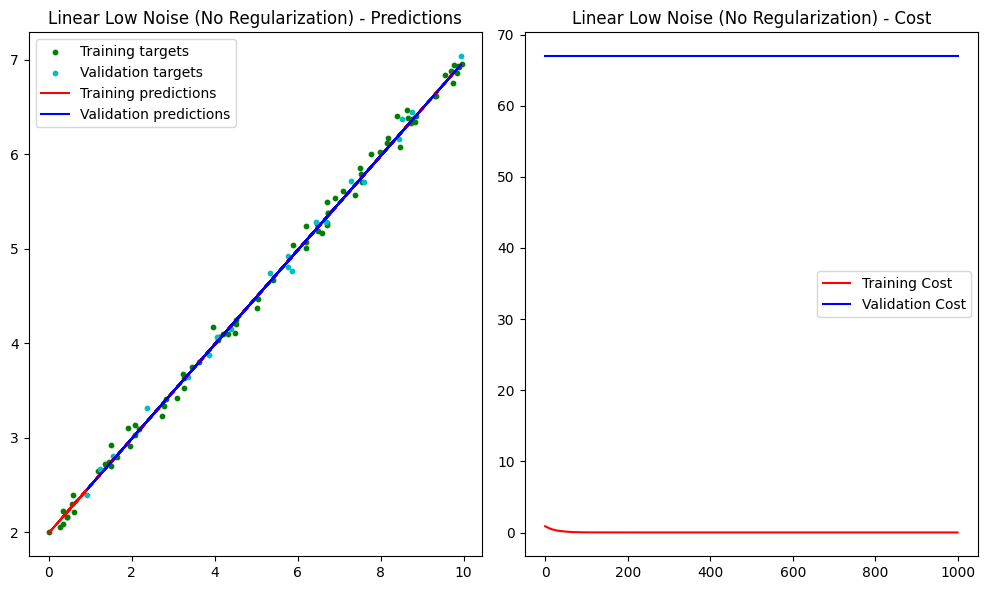

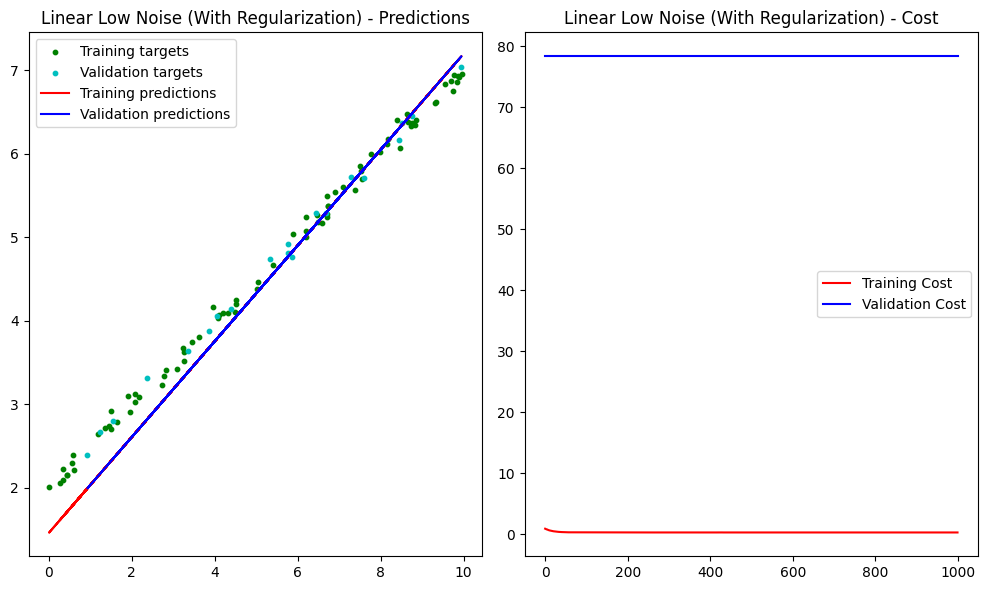

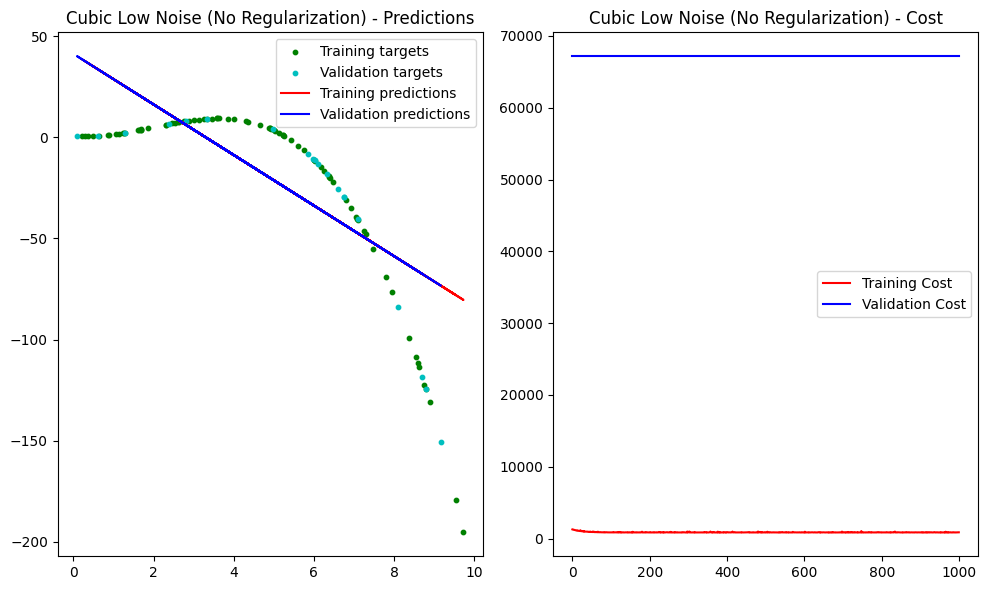

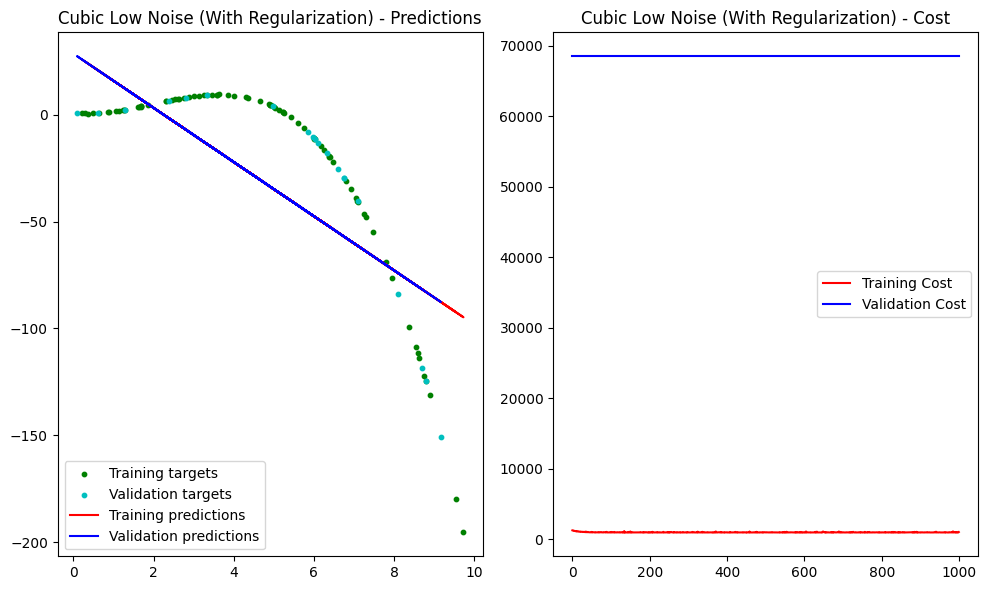

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split data
def split_data(data, test_size=0.2):
    X = data[:, 0]
    t = data[:, 1]
    X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=test_size, random_state=42)
    return X_train, X_val, t_train, t_val

#Stochastic gradient descent (taken from above questions)
def stochastic_gradient_descent(X, t, lr, iterations, batch_size):
    X = X.reshape(-1, 1)
    b = np.ones((len(X), 1))
    X_b = np.append(X, b, axis=1)
    t = t.reshape(-1, 1)
    theta = np.zeros((X_b.shape[1], 1))
    cost_list = []

    for _ in range(iterations):
        indices = np.arange(X_b.shape[0])
        np.random.shuffle(indices)
        X_b_shuffled = X_b[indices]
        t_shuffled = t[indices]

        for start in range(0, X_b.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            t_batch = t_shuffled[start:end]

            # Predict
            y_batch = X_batch.dot(theta)

            # Compute gradients
            gradients = (2 / batch_size) * X_batch.T.dot(y_batch - t_batch)

            # Update theta
            theta -= lr * gradients

        # Calculate cost for the entire dataset
        y_full = X_b.dot(theta)
        cost = np.sum((y_full - t) ** 2) / t.shape[0]
        cost_list.append(cost)

    return cost_list, y_full, theta

#Stochastic gradient descent with regularization (taken from above questions)
def stochastic_gradient_descent_with_regularization(X, t, lr, iterations, reg_lambda, batch_size):
    X = X.reshape(-1, 1)
    b = np.ones((len(X), 1))
    X_b = np.append(X, b, axis=1)
    t = t.reshape(-1, 1)
    theta = np.zeros((X_b.shape[1], 1))
    cost_list = []

    for _ in range(iterations):
        indices = np.arange(X_b.shape[0])
        np.random.shuffle(indices)
        X_b_shuffled = X_b[indices]
        t_shuffled = t[indices]

        for start in range(0, X_b.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_b_shuffled[start:end]
            t_batch = t_shuffled[start:end]

            # Predict
            y_batch = X_batch.dot(theta)

            # Compute gradients with regularization
            gradients = (2 / batch_size) * X_batch.T.dot(y_batch - t_batch) + 2 * reg_lambda * theta

            # Update theta
            theta -= lr * gradients

        #Calculate cost for the entire dataset with regularization
        y_full = X_b.dot(theta)
        cost = (np.sum((y_full - t) ** 2) / t.shape[0]) + reg_lambda * np.sum(theta ** 2)
        cost_list.append(cost)

    return cost_list, y_full, theta

# Predict function
def predict(X, theta):
    X = X.reshape(-1, 1)
    b = np.ones((len(X), 1))
    X_b = np.append(X, b, axis=1)
    predictions = X_b.dot(theta)
    return predictions

# Graphing function
def graph_lr_train_val(X_train, t_train, y_train, cost_list_train, X_val, t_val, y_val, cost_list_val, title="Model Predictions and Cost"):
    plt.figure(figsize=(10, 6))

    # Sub-graph 1: Predictions
    plt.subplot(1, 2, 1)
    plt.title(f'{title} - Predictions')
    plt.scatter(X_train, t_train, c='g', s=10, label="Training targets")
    plt.scatter(X_val, t_val, c='c', s=10, label="Validation targets")
    plt.plot(X_train, y_train, 'r', label="Training predictions")
    plt.plot(X_val, y_val, 'b', label="Validation predictions")
    plt.legend()

    # Sub-graph 2: Cost
    plt.subplot(1, 2, 2)
    plt.title(f'{title} - Cost')
    plt.plot(cost_list_train, 'r', label="Training Cost")
    plt.plot(cost_list_val, 'b', label="Validation Cost")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run training and validation comparison
def run_train_val_comparison():
    datasets = {
        "Linear Low Noise": generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[2, 0.5], theta=0, sigma=0.1),
        "Cubic Low Noise": generate_poly_noisy(n=100, xmin=0, xmax=10, coeffs=[1, -2, 3, -0.5], theta=0, sigma=0.1)
    }

    lr = 0.01
    iterations = 1000
    batch_size = 20
    reg_lambda = 0.1  # Regularization strength

    for name, data in datasets.items():
        X_train, X_val, t_train, t_val = split_data(data)

        #Training without regularization
        cost_list_train_no_reg, y_train_no_reg, theta_no_reg = stochastic_gradient_descent(X_train, t_train, lr, iterations, batch_size)
        y_val_no_reg = predict(X_val, theta_no_reg)
        cost_list_val_no_reg = [np.sum((y_val_no_reg - t_val) ** 2) / len(t_val) for _ in range(iterations)]

        #Training with regularization
        cost_list_train_with_reg, y_train_with_reg, theta_with_reg = stochastic_gradient_descent_with_regularization(X_train, t_train, lr, iterations, reg_lambda, batch_size)
        y_val_with_reg = predict(X_val, theta_with_reg)
        cost_list_val_with_reg = [(np.sum((y_val_with_reg - t_val) ** 2) / len(t_val)) + reg_lambda * np.sum(theta_with_reg ** 2) for _ in range(iterations)]

        # Select plots to meet the requirement of 4 graphs
        if name == "Linear Low Noise":
            graph_lr_train_val(X_train, t_train, y_train_no_reg, cost_list_train_no_reg, X_val, t_val, y_val_no_reg, cost_list_val_no_reg, f"{name} (No Regularization)")
            graph_lr_train_val(X_train, t_train, y_train_with_reg, cost_list_train_with_reg, X_val, t_val, y_val_with_reg, cost_list_val_with_reg, f"{name} (With Regularization)")

        if name == "Cubic Low Noise":
            graph_lr_train_val(X_train, t_train, y_train_no_reg, cost_list_train_no_reg, X_val, t_val, y_val_no_reg, cost_list_val_no_reg, f"{name} (No Regularization)")
            graph_lr_train_val(X_train, t_train, y_train_with_reg, cost_list_train_with_reg, X_val, t_val, y_val_with_reg, cost_list_val_with_reg, f"{name} (With Regularization)")

#Run the comparison
run_train_val_comparison()


## **5. Debugging** ( 2 pts)

( \* \* \* ) What happens to the model predictions when you regularize very strongly -- does it do what you would expect? Can you test this in a few ways? Can you think of a few different datasets that it should be able to fit perfectly? What about a few datasets that it should not be able to fit well? Does it do as expected in each case? This is a hard question because you might need to think very carefully about what to do to test your model thoroughly and how to interpret the results.

You can create cells under this question to argue your answer.

When you regularize a model very strongly, you impose heavy constraints on its complexity, often leading to underfitting. In this case, the model is unable to capture the underlying patterns in the data, regardless of whether the dataset is simple or complex. The model's predictions become overly simplistic, and its performance on both training and test data degrades.